## Automatic extraction and classification of explicit observational sentences in "Astronomia nova" 
 Gerd Graßhoff$^{(1,2)}$, Mohammad Yeghaneh$^{(2)}$

1: Max-Planck-Institute for the History of Science, Berlin

2: Humboldt University, Berlin

Date: November 2019

Kepler's "New Astronomy (Astronomia Nova)" was completed and published in Linz in 1609. Buried deep in this, at times very mystical book, is Kepler's first formulation of his first and second laws of planetary motion, which in modern parlance can be stated as follows:
*  Planetary orbits are ellipses, with the Sun located at one focus;
*  Planets move along their elliptical orbit with a speed such that a line segment joining the planet to the Sun sweeps equal surface areas in equal time intervals.

At the same time he reconceptualized "oppositions" as based upon the observed, rather than "average," position of the Sun, Kepler analyzed Brahe's individual **observations** of Mars for potential errors of various other kinds. with this introduction observations, sentiments play an important role in tracking the knowledge. This motivates us to:  

- extract the explicit observational sentences using the book custom NER model
- provide two models to classify the explicit observational sentences of the book using machine learning #ref

In [2]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc,confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import random 
import ipywidgets as widget
from ipywidgets import interact
#from lime.lime_text import LimeTextExplainer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 1000)


## Resources

### Import resources *

In [5]:
# here I have tried citableclass using DOI and It works! after full agreement on the data (part of book) we can use it. Since we can not change it in Zenodo after upload.

In [6]:
df=pd.read_json('./data/dfObsV05A02P02.json');
df=df.sort_index();
df=df.reset_index(drop=True)

Sample of the first sentences of the book in the dataframe format 

In [7]:
df.head()

,ASO,CNER,Chapter,Entities,Label,ParaIndex,Paragraph,SentIndex,Sentence
0,{'act': 'Chapter'},"[0, 0, 0]",7,[],0,167,Chapter 7,809,Chapter 7
1,{'act': 'circumstances'},"[0, 0, 0]",7,"[[Mars, PLAN]]",0,168,The circumstances under which I happened upon the theory of Mars.,810,The circumstances under which I happened upon the theory of Mars.
2,"{'subject': 'it', 'act': 'is'}","[0, 0, 0]",7,[],0,169,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions. Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence.",811,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions."
3,"{'subject': 'kind', 'act': 'drives', 'obj': 'different individuals '}","[0, 0, 0]",7,[],0,169,"It is true that a divine voice, which enjoins humans to study astronomy, is expressed in the world itself, not in words or syllables, but in things themselves and in the conformity of the human intellect and senses with the sequence of celestial bodies and of their dispositions. Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence.",812,"Nevertheless, a kind of fate also invisibly drives different individuals to take up different arts, and makes them certain that, just as they are a part of the work of creation, they likewise also partake to some extent in divine providence."
4,"{'subject': 'i', 'act': 'embraced', 'obj': 'the whole of it '}","[0, 0, 0]",7,[],0,170,"When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy. I certainly had enough intelligence, nor did I have any difficulty understanding the geometrical and astronomical topics included in the normal curriculum, aided as I was by figures, numbers, and proportions. These were, however, required courses, nothing that would bespeak an exceptional inclination towards astronomy. And since I was supported at the expense of the Duke of Württemberg, and saw my comrades, whom the Prince, upon request, kept trying to send to foreign countries, stalling in various ways out of love for their country, I, being hardier, quite maturely agreed with myself that whithersoever I was destined I would promptly go.",813,"When, in my early years, I was able to taste the sweetness of philosophy, I embraced the whole of it with an overwhelming desire, and with practically no special concern about astronomy."


In [8]:
df[830:840]

,ASO,CNER,Chapter,Entities,Label,ParaIndex,Paragraph,SentIndex,Sentence
830,{'act': 'found'},"[1, 1, 1]",15,"[[1591 June 6, DATE], [12h 20m, TIME], [Mars, PLAN], [27° 14’ 42“ Sagittarius,16, LONG], [latitude, ASTR], [3° 55½’, LONG], [south, ASTR]]",1,354,"On the night following 1589 April 15 at 12h 5m, the planet was found at 3° 58’ 20“ Scorpio,13 with latitude 1° 4’ 20“ north, decreasing. Mars’s altitude was 22⅕°, where refraction from the table for the fixed stars was zero, and from the table for the sun, 3½’. But the parallax was about twice as great as the sun’s, that is, 6 minutes at the horizon. The degree rising was 24° Sagittarius. Therefore, the nonagesimal was 64° from the zenith, giving a diurnal latitudinal parallax of 5’ 24“. Whether it really was that much will become apparent below, through a careful consideration of latitudes ^14. For there, the northern latitude, free from diurnal parallax (and if there is no refraction), would come out to be 1° 9’ 45“ north. And because the altitude of the nonagesimal is 26°, the longitudinal parallax15 at the horizon is 2’ 38“. But Mars is 40° from the nonagesimal, counting from 4° Scorpio to 24° Virgo, which, under the column headed 2’ 38“ shows a true longitudinal parallax of 1...",1639,"On the night following 1591 June 6 at 12h 20m, Mars was found at 27° 14’ 42“ Sagittarius,16 with latitude 3° 55½’ south."
831,"{'subject': 'mars', 'act': 'had', 'obj': 'no more than 6° altitude on the meridian'}","[0, 0, 0]",15,"[[Mars, PLAN], [altitude, ASTR], [meridian, ASTR]]",0,354,"On the night following 1589 April 15 at 12h 5m, the planet was found at 3° 58’ 20“ Scorpio,13 with latitude 1° 4’ 20“ north, decreasing. Mars’s altitude was 22⅕°, where refraction from the table for the fixed stars was zero, and from the table for the sun, 3½’. But the parallax was about twice as great as the sun’s, that is, 6 minutes at the horizon. The degree rising was 24° Sagittarius. Therefore, the nonagesimal was 64° from the zenith, giving a diurnal latitudinal parallax of 5’ 24“. Whether it really was that much will become apparent below, through a careful consideration of latitudes ^14. For there, the northern latitude, free from diurnal parallax (and if there is no refraction), would come out to be 1° 9’ 45“ north. And because the altitude of the nonagesimal is 26°, the longitudinal parallax15 at the horizon is 2’ 38“. But Mars is 40° from the nonagesimal, counting from 4° Scorpio to 24° Virgo, which, under the column headed 2’ 38“ shows a true longitudinal parallax of 1...",1640,"Refraction was of course provided for (from the table for the fixed stars), since it was large, in that Mars had no more than 6° altitude on the meridian."
832,{'act': 'was'},"[0, 0, 0]",15,"[[parallax, ASTR]]",0,354,"On the night following 1589 April 15 at 12h 5m, the planet was found at 3° 58’ 20“ Scorpio,13 with latitude 1° 4’ 20“ north, decreasing. Mars’s altitude was 22⅕°, where refraction from the table for the fixed stars was zero, and from the table for the sun, 3½’. But the parallax was about twice as great as the sun’s, that is, 6 minutes at the horizon. The degree rising was 24° Sagittarius. Therefore, the nonagesimal was 64° from the zenith, giving a diurnal latitudinal parallax of 5’ 24“. Whether it really was that much will become apparent below, through a careful consideration of latitudes ^14. For there, the northern latitude, free from diurnal parallax (and if there is no refraction), would come out to be 1° 9’ 45“ north. And because the altitude of the nonagesimal is 26°, the longitudinal parallax15 at the horizon is 2’ 38“. But Mars is 40° from the nonagesimal, counting from 4° Scorpio to 24° Virgo, which, under the column headed 2’ 38“ shows a true longitudinal parallax of 1...",1641,"There was, however, no mention of parallax."
833,"{'subject': 'mars', 'act': 'was'}","[0, 0, 0]",15,"[[Mars, PLAN], [solar, ASTR]]",0,354,"On the night following 1589 April 15 at 12h 5m, the planet was found at 3° 58’ 20

 Sample of the last sentences of the book in the dataframe format 

In [9]:
df.tail()

,ASO,CNER,Chapter,Entities,Label,ParaIndex,Paragraph,SentIndex,Sentence
1519,{'act': '16'},"[0, 0, 0]",21,[],0,482,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we follow the sun's apparent motion and the hypothesis found in Ch. 16, or the sun's mean motion and the hypothesis proposed in Ch. 8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy). Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his. This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.",2328,"16, or the sun's mean motion and the hypothesis proposed in Ch."
1520,"{'act': 'result', 'obj': 'false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy)'}","[0, 0, 0]",21,"[[Copernicus, NAME]]",0,482,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we follow the sun's apparent motion and the hypothesis found in Ch. 16, or the sun's mean motion and the hypothesis proposed in Ch. 8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy). Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his. This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.",2329,"8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy)."
1521,{'act': 'destroyed'},"[0, 0, 0]",21,"[[Brahean, NAME]]",0,482,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we follow the sun's apparent motion and the hypothesis found in Ch. 16, or the sun's mean motion and the hypothesis proposed in Ch. 8 according to Brahe's revision, in both instances there result false distances of the planet from the center, whether of the sun (for Copernicus and Brahe) or of the world (for Ptolemy). Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his. This was the necessary consequence of our having followed (in imitation of previous theorists) several things that were plausible but really false.",2330,"Consequently, what we had previously constructed from the Brahean observations we have later in turn destroyed using other observations of his."
1522,"{'subject': 'this', 'act': 'was'}","[0, 0, 0]",21,[],0,482,"Up to the present, the hypothesis accounting for the first inequality (in which Brahe and Copernicus are in agreement, both differing somewhat in form from Ptolemy) has been presented using the sun's mean motion, which all three authors had substituted for the sun's apparent motion. Thereafter, it was shown that whether we 

# Distribution of explicit observational sentences 

here we extract the explicit observational sentences using custom Name Entity Recognition that we provided using deep learning. We can see the sentences in the corresponding paragraph. As you see we integrated data with such contributes as follows:

- **Sentence**  
- **Chapter**
- **Paragraph**
- **ParaIndex**
- **ASO**
- **Entities**
- **FNER**
- **Label**

In [10]:
df_obs=df[df.Label==1]

In [11]:
dfChobs=set(df_obs["Chapter"])
dfChobs

{10, 11, 12, 13, 15}

# Data preparation for visualization

In [12]:
a=[]
for i in  dfChobs:
    Obch=df_obs[df_obs.Chapter == i].shape[0]
    a.append(Obch)

Text(0.5, 1.0, 'Distribution of observation over different chapters')

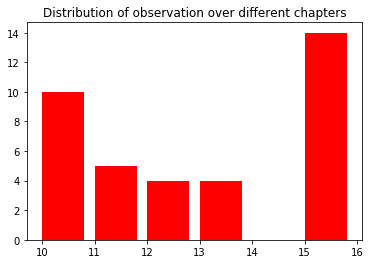

In [13]:
plt.bar(list(dfChobs),a,color="r",align='edge', width=.8)

plt.title("Distribution of observation over different chapters")


## Distribution of explicit observational Sentences

In [14]:
X=list(df["Sentence"])
y=np.array(list(df["Label"]))

In [15]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [16]:
count

{0: 1487, 1: 37}

TypeError: unsupported operand type(s) for +: 'int' and 'dict_values'

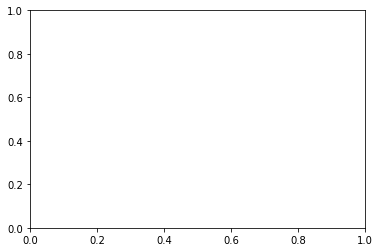

In [17]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [ ]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier

#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [ ]:
trial_05

# Extract explicit observational sentences using custom NER in the paragraph

In [ ]:
X_Obs=df.loc[df.Label==1]
X_Obs=X_Obs[["Sentence","Paragraph"]]


In [ ]:
def ShowObsPara(a=1):
    return X_Obs.head(a)


In [ ]:
interact(ShowObsPara,a=(1,50));

In [ ]:
Y_Obs=df.loc[df.Label==1]
Y_Obs=Y_Obs.Label
Y_Obs=list(Y_Obs)
NumberObs=len(Y_Obs)

# Non-observational sentences  in the pragraph

In [ ]:
X_NObs=df.loc[df.Label==0]
X_NObs=X_NObs[["Sentence","Paragraph"]]

In [ ]:
X_NObs.head(10)

In [ ]:
Y_NObs=df.loc[df.Label==0]
Y_NObs=Y_NObs.Label
Y_NObs=list(Y_NObs)

In [ ]:
x_obs = X_Obs.loc[0:, 'Sentence'].values
x_nobs = X_NObs.loc[0:36, 'Sentence'].values


In [ ]:
len(x_obs)

In [ ]:
len(x_nobs)

In [ ]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,NumberObs);
len(Y_NObs)

In [ ]:
y=Y_NObs+Y_Obs

In [ ]:
X1=x_nobs.tolist()

In [ ]:
len(X1)

In [ ]:
X2=x_obs.tolist()

In [ ]:
X=X1+X2

In [ ]:
len(X)

In [ ]:
len(y)

# Distribution of Samples  after downsampling

In [ ]:
category=Counter(y)
count=dict(category)

In [ ]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [ ]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

# 1- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

In [ ]:
cross_validation_accuracy(trial_06,X,y,cv=10)

In [ ]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

In [ ]:
print(cm)

In [ ]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


In [ ]:
plot_pr(recall, precision)

## 2-SGD

In [ ]:
trial_05.fit(X_train,y_train)

In [ ]:
y_pred=trial_05.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Colorful_Confusion_Matrix(y, y_test, y_pred)


In [ ]:
cross_validation_accuracy(trial_05,X,y,cv=10)

In [ ]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)

In [ ]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


In [ ]:
plot_pr(recall, precision)

##  Save the down sampled model

import pickle
saved_model = pickle.dumps(trial_06)

Pkl_Filename = "Pickle_RF_RESAMPLED_Model_02.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)

# Add visualisation for interpretation

In [ ]:
dfObs=df[df.Label==1]

In [ ]:
def ShowObs(a=1):
    return dfObs.head(a)


In [ ]:
interact(ShowObs, a=(1,50));

## Save Explicit Observational Sententces (Part 2) as json file

In [ ]:
dfObs.to_json(r'ExpObsP02.json')


# Interpretability

In [ ]:
class_names = ['Not-Observation','Observation']
explainer = LimeTextExplainer(class_names=class_names)
idx = 83
exp = explainer.explain_instance(X_train[13], trial_06.predict_proba, num_features=20)

In [ ]:
exp.show_in_notebook()


In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
dftest=pd.read_json('ExpObsP02.json');

In [ ]:
dftest

In [ ]:
df[574:575]